<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Projetos-de-Estudo-CD-FaTec-Ourinhos/blob/main/Kruskal_Floyd_Busca_em_Profundidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código de Kruskal e um algoritmo para realizar a detecção de Ciclos (Floyd /Algoritmo busca em profundidade) em Grafos Ponderados implementado para uma Árvore de Espalhamento Mínima para o grafo abaixo.

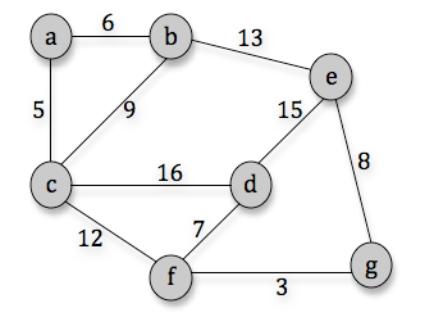

In [8]:
print('*'*72)
print('Código de Kruskal e um algoritmo para realizar a detecção de Ciclos\n(Floyd /Algoritmo busca em profundidade) em Grafos Ponderados\nimplementado para uma Árvore de Espalhamento Mínima para o grafo abaixo.')
print('*'*72)

class Vertex:
    def __init__(self, name):
        self.name = name
        self.connected_to = {}

    def addNeighbor(self, neighbor, weight=0):
        self.connected_to[neighbor] = weight

    def getWeight(self, neighbor):
        if neighbor in self.connected_to:
            return self.connected_to[neighbor]
        else:
            return float("inf")

    def getName(self):
        return self.name

    def getNeighbors(self):
        return self.connected_to.keys()

class Graph:
    def __init__(self):
        self.vertex_list = {}
        self.n_vertices = 0

    def addVertex(self, name):
        self.n_vertices += 1
        self.vertex_list[name] = Vertex(name)

    def getVertex(self, name):
        if name in self.vertex_list:
            return self.vertex_list[name]
        else:
            return None

    def addEdge(self, f_vertex, t_vertex, weight):
        if f_vertex not in self.vertex_list:
            self.addVertex(f_vertex)
        if t_vertex not in self.vertex_list:
            self.addVertex(t_vertex)
        self.vertex_list[f_vertex].addNeighbor(t_vertex, weight)

    def getVertices(self):
        return self.vertex_list.keys()

class Kruskal:
    def __init__(self, graph):
        self.edges = {}
        self.sets = {}
        T = []
        for x in graph.vertex_list.keys():
            connections = graph.vertex_list[x].connected_to
            for y in connections.keys():
                edge_name = x + '-' + y
                reverse = y + '-' + x
                if reverse not in self.edges.keys():
                    self.edges[edge_name] = connections[y]
        self.edges = sorted(self.edges.items(), key=lambda x: (x[1], x[0]))

        for x in graph.vertex_list.keys():
            self.sets[x] = [x, 1]

    def mst(self, graph):
        T = []
        for x in self.edges:
            u = x[0][0]
            v = x[0][2]
            if self.findSetParent(u) != self.findSetParent(v):
                T.append(x)
                self.union(u, v)
        weight = 0
        edges_string = ''
        for x in T:
            weight += x[1]
            edges_string += x[0] + ', '
        edges_string = edges_string[:len(edges_string) - 2]
        print("Árvore de abrangência mínima: Pesos totais nas arestas do MST = " + str(weight))
        print("Conjunto de nós = " + str(sorted(graph.vertex_list.keys())) + ", Conjunto de borda = {" + edges_string + '}')        
        
        return T

    def findSetParent(self, child):
        if (self.sets[child][0] == child):
            return child
        else:
            return self.findSetParent(self.sets[child][0])

    def union(self, u, v):
        if (self.sets[self.findSetParent(u)][1] > self.sets[self.findSetParent(v)][1]):
            self.sets[v][0] = self.sets[u][0]
        elif (self.sets[self.findSetParent(u)][1] > self.sets[self.findSetParent(v)][1]):
            self.sets[u][0] = self.sets[v][0]
        else:
            self.sets[self.findSetParent(u)][0] = self.sets[v][0]
            self.sets[self.findSetParent(v)][1] += 1


def main():
    g = Graph()

    g.addEdge('A', 'B', 6)
    g.addEdge('A', 'C', 5)
    g.addEdge('B', 'C', 9)
    g.addEdge('B', 'E', 13)
    g.addEdge('C', 'D', 16)
    g.addEdge('C', 'F', 12)
    g.addEdge('D', 'F', 7)
    g.addEdge('E', 'D', 15)
    g.addEdge('E', 'G', 8)
    g.addEdge('G', 'F', 3)

    k = Kruskal(g)
    k.mst(g)

if __name__ == "__main__":
    main()

print()
print('FIM DO PROGRAMA')

************************************************************************
Código de Kruskal e um algoritmo para realizar a detecção de Ciclos
(Floyd /Algoritmo busca em profundidade) em Grafos Ponderados
implementado para uma Árvore de Espalhamento Mínima para o grafo abaixo.
************************************************************************
Árvore de abrangência mínima: Pesos totais nas arestas do MST = 41
Conjunto de nós = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], Conjunto de borda = {G-F, A-C, A-B, D-F, E-G, C-F}

FIM DO PROGRAMA
